**Indiquer dans la boîte ci-dessous vos noms et prénoms**

Nom: SERSI Prénom: Skander

# Prédiction du gagnant d'un matche.

## Partie 1 - Description du problème

Nous cherchons à prédire les matches du championnat espagnol de la saison 2015/2016.
Nous allons donc entrainer notre modèle sur les matches d'avant de 2008 à 2015.


Notre idée est de prédire les scores des matches selon la somme totale des scores d'attaques de chaque joueur de chaque équipe jouant un matche. Les scores d'attaque de l'équipe à domicile et l'équipe visiteuse constituent les coordonnées de nos points.
Si le matche est gagné par l'équipe à domicile le label associé est 1, si c'est l'équipe visiteuse qui gagne le label sera -1.

Nous allons utiliser l'algorithme du Perceptron, du KernelPerceptron, du RandomClassifier ainsi que celui des arbres de décision.

Et on cherche aussi à trouver quel est l'algo qui nous corrrespond le mieux pour nos prédictions.

## Partie 2 - Modèle

Base d'apprentissage des matches du championnat espagnol d'avant la saison 2015/2016 en enlevant les matches nuls.
Base de test des matches du championnat espagnol de la saison 2015/2016 en enlevant les matches nuls.

## Partie 3 - Code

In [2]:
import pandas as pd
import numpy as np
from scipy.stats.kde import gaussian_kde
from scipy.stats import norm
from numpy import linspace,hstack
from pylab import plot,show,hist
import matplotlib.pyplot as plt
import random
import warnings; 
%matplotlib inline

In [3]:
#lecture de la base des matches et selection des matches avant 2015/2016 correspondants à la ligue espagnole
#Cette base correspond à notre base d'apprentissage
data_Matche = pd.read_csv("projet/match.csv")
training_data = data_Matche.loc[data_Matche['season'] != '2015/2016']
training_data = training_data.loc[training_data['league_id'] == 21518]
training_data = training_data.dropna(subset = ['home_team_api_id','away_team_api_id','home_team_goal','away_team_goal','home_player_1','home_player_2','home_player_3','home_player_4','home_player_5','home_player_6','home_player_7','home_player_8','home_player_9','home_player_10','home_player_11','away_player_1','away_player_2','away_player_3','away_player_4','away_player_5','away_player_6','away_player_7','away_player_8','away_player_9','away_player_10','away_player_11'])



In [4]:
#lecture de la base des matches et selection des matches de la saison 2015/2016 correspondants à la ligue espagnole
#cette base correspond à notre base de test.
testing_data = data_Matche.loc[data_Matche['season'] == '2015/2016']
testing_data = testing_data.loc[testing_data['league_id'] == 21518]
test = testing_data.dropna(subset = ['home_team_api_id','away_team_api_id','home_team_goal','away_team_goal','home_player_1','home_player_2','home_player_3','home_player_4','home_player_5','home_player_6','home_player_7','home_player_8','home_player_9','home_player_10','home_player_11','away_player_1','away_player_2','away_player_3','away_player_4','away_player_5','away_player_6','away_player_7','away_player_8','away_player_9','away_player_10','away_player_11'])

In [5]:
#Selection des attributs des joueurs
data_Player = pd.read_csv("projet/playerattributes.csv")
data_Player = data_Player.dropna(subset = ['finishing'])

In [6]:
class LabeledSet:  
    
    def __init__(self, input_dimension):
        self.input_dimension = input_dimension
        self.nb_examples = 0
    
    def addExample(self, vector, label):
        if (self.nb_examples == 0):
            self.x = np.array([vector])
            self.y = np.array([label])
        else:
            self.x = np.vstack((self.x,vector))
            self.y = np.vstack((self.y,label))
        
        self.nb_examples = self.nb_examples + 1
    
    #Renvoie la dimension de l'espace d'entrée
    def getInputDimension(self):
        return self.input_dimension
        
    #Renvoie le nombre d'exemples dans le set
    def size(self):
        return self.nb_examples
    
    #Renvoie la valeur de x_i
    def getX(self, i):
        return self.x[i]
            
    #Renvoie la valeur de y_i
    def getY(self, i):
        return self.y[i]

In [7]:
class Classifier:
    def __init__(self, input_dimension):
        raise NotImplementedError("Please Implement this method")
    
    #Permet de calculer la prediction sur x => renvoie un score
    def predict(self, x):
        raise NotImplementedError("Please Implement this method")
    
    #Permet d'entrainer le modele sur un ensemble de données
    def train(self, labeledSet):
        raise NotImplementedError("Please Implement this method")
    
    #Permet de calculer la qualité du système 
    def accuracy(self, dataset):
        nb_ok = 0
        for i in range(dataset.size()):
            output = self.predict(dataset.getX(i))
            if (output * dataset.getY(i) > 0):
                nb_ok = nb_ok + 1
        acc = nb_ok /(dataset.size() * 1.0) 
        return acc

In [23]:
class Perceptron(Classifier):
    
    def __init__(self, input_dimension, learning_rate, nombre_iterations):
        self.input_dimension=input_dimension
        self.learning_rate=learning_rate
        self.nombre_iterations=nombre_iterations
        self.w=2*(np.random.rand(input_dimension))-1
    
    def train_1it(self, trainingData):
        for i in range(trainingData.size()):
                if self.predict(trainingData.getX(i))*trainingData.getY(i)<0:
                    self.w=self.w+(self.learning_rate*trainingData.getY(i)*trainingData.getX(i))
    
    def compare(self, tab1,tab2):
        for i in range(len(tab1)):
            for j in range(len(tab2)):
                if tab1[i]!=tab2[j]:
                    return -1
        return 1
    
    def train(self, trainingData):
        tabk=[]
        tabscore=[]
        v=[0,0]
        k=0
        while self.compare(v,self.w)!=1 and k<self.nombre_iterations:
            v=self.w
            if k%10==0:
                tabk.append(k)
                tabscore.append(self.accuracy(trainingData))
            self.train_1it(trainingData)
            k = k + 1
            
        plt.plot(tabk, tabscore, 'ro')
        plt.show()
        
    def predict(self, x):
        z = np.dot(self.w,x)
        if z > 0:
            return +1
        else:
            return -1

In [24]:
class ClassifierRandom(Classifier):
    def __init__(self, input_dimension):
        self.input_dimension=input_dimension
        self.w=np.random.randn(self.input_dimension)
    
    def predict (self,x):
        return np.dot(x,self.w)

In [8]:
class PerceptronKernel(Classifier):
    def __init__(self,dimension_kernel,learning_rate,kernel,nombre_iterations):
        self.dimension_kernel = dimension_kernel
        self.learning_rate = learning_rate
        self.kernel = kernel
        self.nombre_iterations = nombre_iterations 
        self.w = 2*(np.random.rand(dimension_kernel))-1
        
    def train_1it(self, trainingData):
        for i in range(trainingData.size()):
                if self.predict(trainingData.getX(i))*trainingData.getY(i)<0:
                    self.w=self.w+(self.learning_rate*trainingData.getY(i)*(self.kernel.transform(trainingData.getX(i))))
                                                                            
    #Permet de calculer la prediction sur x => renvoie un score
    def predict(self, x):
        t=self.kernel.transform(x)
        z = np.dot(t,self.w)
        if z > 0:
            return +1
        else:
            return -1

    
    #Permet d'entrainer le modele sur un ensemble de données
    def train(self,labeledSet):
        tabk=[]
        tabscore=[]
        #v=[0,0]
        k=0
        while k<self.nombre_iterations:
            #v=self.w
            if k%10==0:
                tabk.append(k)
                tabscore.append(self.accuracy(labeledSet))
            self.train_1it(labeledSet)
            k = k + 1
            
        plt.plot(tabk, tabscore, 'ro')
        plt.show()

    #Permet de calculer la qualité du système 
    def accuracy(self,dataset):
        nb_ok = 0
        for i in range(dataset.size()):
            output = self.predict(dataset.getX(i))
            if (output * dataset.getY(i) > 0):
                nb_ok = nb_ok + 1
        acc = nb_ok / (dataset.size() * 1.0)
        return acc

In [9]:
import pprint

def get_score_attack(player):
    return data_Player.loc[data_Player['player_api_id'] == player,['finishing']].head(1)

#retourne le score d'attaque d'une équipe donnée
def get_score_attack_team(team):
    
    squad = pd.DataFrame(team).transpose()
    
    res = pd.DataFrame(columns = ['finishing'])
    for i in squad[team.index[0]]:
        
        score = get_score_attack(int(i))
        
        res = res.append(score)
        val =  res.sum().values[0]
        return val

def calcul_attack_score(dataframe):
    # nbg : nombre de rencontres gagnées par les équipes gagnantes avec les scores d'attaques
    nbg = 0
    # nbp : nombre de rencontres perdues ou avec un matche nul par des équipes gagnantes au score d'attaque
    nbp = 0
    for i in dataframe.index:
        score_attaque_equipe_home = get_score_attack_team(dataframe.loc[dataframe.index == i,['home_player_1','home_player_2','home_player_3','home_player_4','home_player_5','home_player_6','home_player_7','home_player_8','home_player_9','home_player_10','home_player_11']])
        score_attaque_equipe_away = get_score_attack_team(dataframe.loc[dataframe.index == i,['away_player_1','away_player_2','away_player_3','away_player_4','away_player_5','away_player_6','away_player_7','away_player_8','away_player_9','away_player_10','away_player_11']])
    return [score_attaque_equipe_home,score_attaque_equipe_away]

In [10]:
# Fonction qui nous renvoie un labeledset avec un dataframe donné
def remplissage_ls(dataframe):
    ls =  LabeledSet(2)
    for i in dataframe.index:
        ls.addExample(calcul_attack_score(dataframe.loc[dataframe.index == i]),winner(dataframe.loc[dataframe.index == i]))
    return ls

In [11]:
def plot_frontiere(set, classifier, step=20):
    mmax = set.x.max(0)
    mmin = set.x.min(0)
    x1grid, x2grid = np.meshgrid(np.linspace(mmin[0], mmax[0], step), np.linspace(mmin[1], mmax[1], step))
    grid = np.hstack((x1grid.reshape(x1grid.size, 1), x2grid.reshape(x2grid.size, 1)))
    
    # calcul de la prediction pour chaque point de la grille
    res = np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res = res.reshape(x1grid.shape)
    # tracé des frontieres
    plt.contourf(x1grid, x2grid, res, colors=["red", "cyan"], levels=[-1000,0,1000], linewidth=2)

In [12]:
# Permet d'afficher les figures directement dans le notebook:
%matplotlib inline

def plot2DSet(dataset):
    plt.scatter(dataset.x[0:int(dataset.size()/2),0],dataset.x[0:int(dataset.size()/2),1],marker='o')
    plt.scatter(dataset.x[int(dataset.size()/2):dataset.size(),0],dataset.x[int(dataset.size()/2):dataset.size(),1],marker='x')

C:\Users\Skander\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


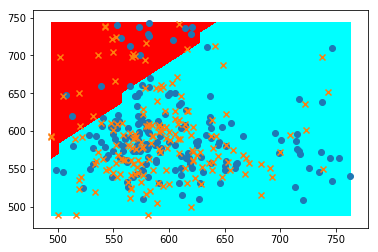

In [13]:
#nous renvoie le gagnant d'un matche
def winner(dataframe):
    #print('rentré')
    if dataframe["home_team_goal"].values[0] > dataframe["away_team_goal"].values[0]:
        return 1
    else:
        return -1


In [14]:
class KernelBias:
    def transform(self,x):
        l=list()
        for i in range(len(x)):
            l.append(x[i])
        l.append(1)
        return np.asarray(l)

In [17]:
#prof
class KernelPoly:
        def transform(self,x):
            l= [1]
            for i in range(len(x)):
                l.append(x[i])
            for i in range(len(x)):
                for j in range(i,len(x)):
                    l.append(x[i]*x[j])
            return np.asarray(l)

In [29]:
import math as m
def classe_majoritaire(labeledSet):
    nbm=0
    nbp=0
    for i in range(labeledSet.size()):
        if labeledSet.getY(i)==-1:
            nbm+=1
        else:
            nbp+=1
    if nbp>=nbm:
        return 1
    else:
        return -1

def shannon(l):
    s=0
    for i in range(len(l)):
        if l[i]==0:
            s= s + 0
        else: 
            s= s + l[i]*m.log2(l[i])
    return (-1)*s    

def list_proba(labeledSet):
    l =  list()
    nbm = 0
    nbp = 0
    for i in range(labeledSet.size()):
        if labeledSet.getY(i)==1:
            nbp+=1
        else:
            nbm+=1
    size=labeledSet.size();
    if (labeledSet.size()==0):
        size=1
    l.append((nbp*100)/size/100)
    l.append((nbm*100)/size/100)
    return l

def entropie(LabeledSet):
        l=list_proba(LabeledSet)
        return shannon(l)

def discretise(LSet, col):
    """ LabelledSet * int -> tuple[float, float]
        col est le numéro de colonne sur X à discrétiser
        rend la valeur de coupure qui minimise l'entropie ainsi que son entropie.
    """
    # initialisation:
    min_entropie = 1.1  # on met à une valeur max car on veut minimiser
    min_seuil = 0.0     
    # trie des valeurs:
    ind= np.argsort(LSet.x,axis=0)
    
    # calcul des distributions des classes pour E1 et E2:
    inf_plus  = 0               # nombre de +1 dans E1
    inf_moins = 0               # nombre de -1 dans E1
    sup_plus  = 0               # nombre de +1 dans E2
    sup_moins = 0               # nombre de -1 dans E2       
    # remarque: au départ on considère que E1 est vide et donc E2 correspond à E. 
    # Ainsi inf_plus et inf_moins valent 0. Il reste à calculer sup_plus et sup_moins 
    # dans E.
    for j in range(0,LSet.size()):
        if (LSet.getY(j) == -1):
            sup_moins += 1
        else:
            sup_plus += 1
    nb_total = (sup_plus + sup_moins) # nombre d'exemples total dans E
    
    # parcours pour trouver le meilleur seuil:
    for i in range(len(LSet.x)-1):
        v_ind_i = ind[i]   # vecteur d'indices
        courant = LSet.getX(v_ind_i[col])[col]
        lookahead = LSet.getX(ind[i+1][col])[col]
        val_seuil = (courant + lookahead) / 2.0;
        # M-A-J de la distrib. des classes:
        # pour réduire les traitements: on retire un exemple de E2 et on le place
        # dans E1, c'est ainsi que l'on déplace donc le seuil de coupure.
        if LSet.getY(ind[i][col])[0] == -1:
            inf_moins += 1
            sup_moins -= 1
        else:
            inf_plus += 1
            sup_plus -= 1
        # calcul de la distribution des classes de chaque côté du seuil:
        nb_inf = (inf_moins + inf_plus)*1.0     # rem: on en fait un float pour éviter
        nb_sup = (sup_moins + sup_plus)*1.0     # que ce soit une division entière.
        # calcul de l'entropie de la coupure
        val_entropie_inf = shannon([inf_moins / nb_inf, inf_plus  / nb_inf])
        val_entropie_sup = shannon([sup_moins / nb_sup, sup_plus  / nb_sup])
        val_entropie = (nb_inf / nb_total) * val_entropie_inf + (nb_sup / nb_total) * val_entropie_sup
        # si cette coupure minimise l'entropie, on mémorise ce seuil et son entropie:
        if (min_entropie > val_entropie):
            min_entropie = val_entropie
            min_seuil = val_seuil
    return (min_seuil, min_entropie)

def divise(LSet, att, seuil):
    Linf = LabeledSet(2)
    Lsup = LabeledSet(2)
    for i in range(LSet.size()):
        if (LSet.getX(i)[att]<seuil):
            Linf.addExample(LSet.getX(i), LSet.getY(i))
        else:
            Lsup.addExample(LSet.getX(i), LSet.getY(i))
    return Linf,Lsup

def construit_AD(Lset, epsilon):
    arbre = ArbreBinaire()
    if entropie(Lset) <= epsilon:
        arbre.ajoute_feuille(classe_majoritaire(Lset))
        return arbre
    entropie_min = 1.0
    seuil = .0
    att = 0
    for c in range(Lset.x.shape[1]):
        s, ent = discretise(Lset, c)
        if ent < entropie_min:
            seuil = s
            att = c
            entropie_min = ent
    Linf, Lsup = divise(Lset, att, seuil)
    arbre.ajoute_fils(construit_AD(Linf, epsilon), construit_AD(Lsup, epsilon), att, seuil)
    return arbre

class ArbreDecision(Classifier):
    # Constructeur
    def __init__(self,epsilon):
        # valeur seuil d'entropie pour arrêter la construction
        self.epsilon= epsilon
        self.racine = None
    
    # Permet de calculer la prediction sur x => renvoie un score
    def predict(self,x):
        # classification de l'exemple x avec l'arbre de décision
        # on rend 0 (classe -1) ou 1 (classe 1)
        classe = self.racine.classifie(x)
        if (classe == 1):
            return 1
        else:
            return -1
    
    # Permet d'entrainer le modele sur un ensemble de données
    def train(self,setu):
        # construction de l'arbre de décision 
        self.set=setu
        self.racine = construit_AD(setu,self.epsilon)

    # Permet d'afficher l'arbre
    def plot(self):
        gtree = gv.Digraph(format='png')
        return self.racine.to_graph(gtree)
        

In [30]:
import graphviz as gv

class ArbreBinaire:
    def __init__(self):
        self.attribut = None   # numéro de l'attribut
        self.seuil = None
        self.inferieur = None # ArbreBinaire Gauche (valeurs <= au seuil)
        self.superieur = None # ArbreBinaire Droit (valeurs > au seuil)
        self.classe = None # Classe si c'est une feuille: -1 ou +1
        
    def est_feuille(self):
        """ rend True si l'arbre est une feuille """
        return self.seuil == None
    
    def ajoute_fils(self,ABinf,ABsup,att,seuil):
        """ ABinf, ABsup: 2 arbres binaires
            att: numéro d'attribut
            seuil: valeur de seuil
        """
        self.attribut = att
        self.seuil = seuil
        self.inferieur = ABinf
        self.superieur = ABsup
    
    def ajoute_feuille(self,classe):
        """ classe: -1 ou + 1
        """
        self.classe = classe
        
    # Permet d'afficher l'arbre
    def plot(self):
        gtree = gv.Digraph(format='png')
        return self.to_graph(gtree)
    
    def classifie(self,exemple):
        """ exemple : numpy.array
            rend la classe de l'exemple: +1 ou -1
        """
        if self.est_feuille():
            #print(self.classe)
            return self.classe
        if exemple[self.attribut] <= self.seuil:
            #print('gauche')
            return self.inferieur.classifie(exemple)
        #print('droite')
        return self.superieur.classifie(exemple)
    
    def to_graph(self, g, prefixe='A'):
        """ construit une représentation de l'arbre pour pouvoir
            l'afficher
        """
        if self.est_feuille():
            g.node(prefixe,str(self.classe),shape='box')
        else:
            g.node(prefixe, str(self.attribut))
            self.inferieur.to_graph(g,prefixe+"g")
            self.superieur.to_graph(g,prefixe+"d")
            g.edge(prefixe,prefixe+"g", '<='+ str(self.seuil))
            g.edge(prefixe,prefixe+"d", '>'+ str(self.seuil))
        
        return g

In [31]:
class ClassifierBaggingTree(Classifier):
    def __init__(self,nbArbres,ratio,seuil,r):
        self.nbArbres = nbArbres
        self.ratio = ratio
        self.seuil = seuil
        self.r = r
        self.res = set()
    
    # Permet de calculer la prediction sur x => renvoie un score
    def predict(self,x):
        nbp = 0
        nbm = 0
        for elt in self.res:
            
            if(elt.classifie(x)) == 1:
                nbp += 1
                #print('hahaaa')
            else:
                #print('hihi')
                nbm += 1
        
        if nbp>=nbm:
            return 1
        else:
            return -1
            

    
    # Permet d'entrainer le modele sur un ensemble de données étiquetés
    def train(self,labeledSet):
        for i in range(self.nbArbres):
            #print(self.ratio,' size',labeledSet.size(),' -- ',int((self.ratio*labeledSet.size())))
            E = echantillonLS(labeledSet,int(self.ratio*labeledSet.size()),self.r)
            ad = construit_AD(E, self.seuil)
            
            self.res.add(ad)
        return ad

In [33]:
# Fonction qui étant donné un LabeledSet X, un nombre entier m, et un booléen rend un échantillon de X de taille m sous la forme d'un LabeledSet.
#L'échantillon est obtenu par un tirage avec remise si le booléen est True, sinon, il est obtenu sans remise.
def echantillonLS(X,m,r):
    LS = LabeledSet(2)
    L= [i for i in range(0,X.size())]
    L_choisis = tirage(L,m,r)
    for i in L_choisis:
        LS.addExample(X.getX(i),X.getY(i))
    return LS

In [35]:
# Fonction qui  qui étant donné un vecteur d'entiers VX  qui représente l'ensemble des indices des exemples d'une base d'apprentissage  X , un entier  m , et un booléen  r
# rend un vecteur de  m  indices choisis aléatoirement dans  VXVX . Si le booléen  rr  est vrai, le tirage s'effectue avec remise, sinon il s'effectue sans remise.
def tirage(vx,m,r):
    l = list()
    if r==True:
        for i in range(m):
            l.append(random.choice(vx))
    else:
            l = random.sample(vx,m)
    return l

In [42]:
# Divise un dataset en 10 parties pour la méthode out of bags
def diviser_dataset(dataset):
    indexes = [i for i in range(dataset.size())]
    size = int(dataset.size()/10)
    datasets = []
    
    for i in range(10):
        echantillon = random.sample(indexes, size)
        
        d = LabeledSet(2)
        for j in echantillon:
            d.addExample(dataset.getX(j), dataset.getY(j))
        datasets.append(d)
        
        indexes = list(set(indexes) - set(echantillon))
    
    return datasets

datasets = diviser_dataset(ls_match)

# Colle les 9 premiers labeledsets et les renvoie sous forme de labeledset
def coller_data(datasets):
    dataset =  LabeledSet(2)
    for i in range(9):
        for j in range(datasets[i].size()):
            dataset.addExample(datasets[i].getX(j),datasets[i].getY(j))
    return dataset


## Partie 4 - Protocole expérimental

In [46]:
#On choisit deux équipes, on entraine notre modèle sur la base d'apprentissage des matches des deux équipes de 2008 à 2015.
#1) on doit extraire de la base d'apprentissage les matches des deux équipes, et calculer pour chaque la moyenne des scores d'attaques
# et la coordonnée x correspond au score d'attaque de l'équipe à domicile et y le score d'attaque de l'équipe visiteuse.
import operator as operator
#remplir dataset par équipe nous allons prendre les matches chelsea à domicile depuis 2008''
train = training_data.loc[training_data['home_team_api_id'] == 8634]
ls_match = remplissage_ls(train)

#test = test.loc[training_data['away_team_api_id'] == 8634]
ls_test  = remplissage_ls(test)


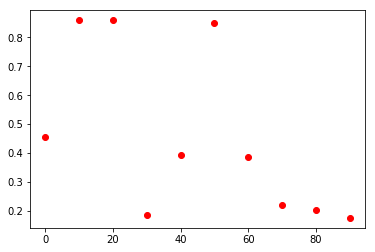

In [25]:
percnorm = Perceptron(2,0.0001,100)
percnorm.train(ls_match)

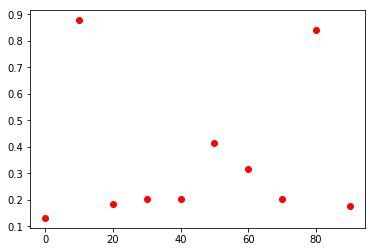

In [20]:
N=100
k=KernelPoly()
perc=PerceptronKernel(6,0.0001,k,N)
perc.train(ls_match)

## Partie 5 - Résultats

C:\Users\Skander\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


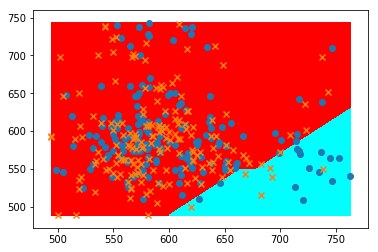

In [21]:
plot_frontiere(ls_test,perc,20)
plot2DSet(ls_test)

Nous allons  voir quel Perceptron est le mieux adapté pour notre model.

In [26]:
percnorm.accuracy(ls_test)

0.5327635327635327

In [22]:
perc.accuracy(ls_test)

0.5641025641025641

In [27]:
cr=ClassifierRandom(2)
cr.accuracy(ls_test)

0.47863247863247865

In [39]:
foret = ClassifierBaggingTree(10,0.3,0.0,True)
ad = foret.train(ls_match)

print("\naccuracy totale:",foret.accuracy(ls_test))


accuracy totale: 0.5384615384615384


On en déduit que le KernelPoly est le mieux adapté pour notre modele.

## Partie 6 - Analyse

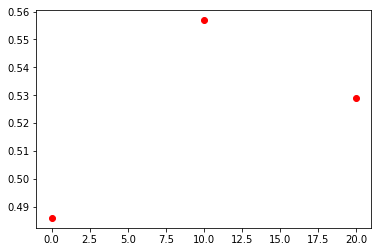

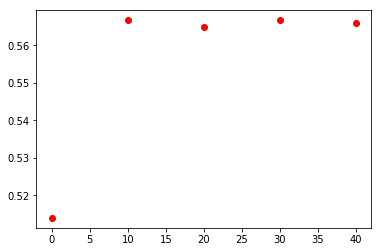

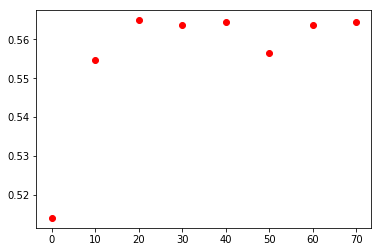

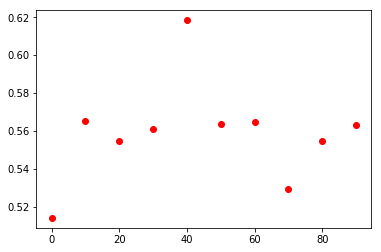

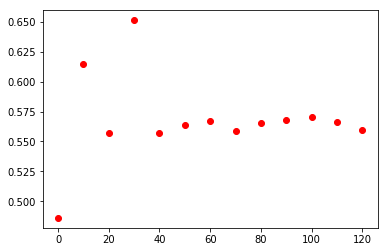

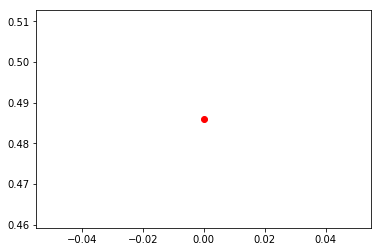

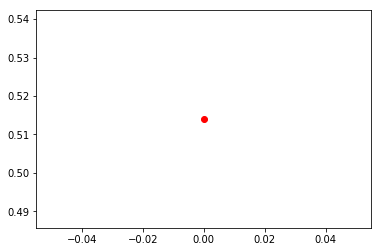

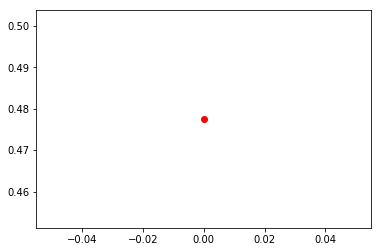

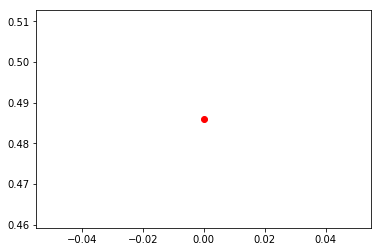

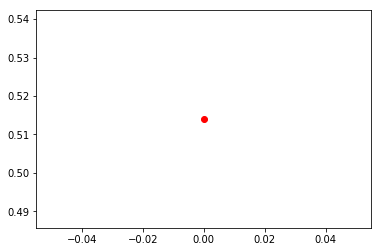

In [120]:
#Learning rate fixé à 0.02, nb itér variable
perce_test_25_1 = Perceptron(2,0.02,25)
perce_test_50_1 = Perceptron(2,0.02,50)
perce_test_75_1 = Perceptron(2,0.02,75)
perce_test_100_1 = Perceptron(2,0.02,100)
perce_test_125_1 = Perceptron(2,0.02,125)

#Nb itér fixé à 10 , learning rate variable
perce_test_0_2 = Perceptron(2,0.02,10)
perce_test_4_2 = Perceptron(2,0.05,10)
perce_test_8_2 = Perceptron(2,0.07,10)
perce_test_12_2 = Perceptron(2,0.10,10)
perce_test_16_2 = Perceptron(2,0.12,10)

#Train
perce_test_25_1.train(ls_match)
perce_test_50_1.train(ls_match)
perce_test_75_1.train(ls_match)
perce_test_100_1.train(ls_match)
perce_test_125_1.train(ls_match)

perce_test_0_2.train(ls_match)
perce_test_4_2.train(ls_match)
perce_test_8_2.train(ls_match)
perce_test_12_2.train(ls_match)
perce_test_16_2.train(ls_match)

listAccuracy_test_perce_nbit = [perce_test_25_1.accuracy(ls_test), perce_test_50_1.accuracy(ls_test)
                      ,perce_test_75_1.accuracy(ls_test)
                      ,perce_test_100_1.accuracy(ls_test)
                      ,perce_test_125_1.accuracy(ls_test)]

listAccuracy_test_perce_learate = [perce_test_0_2.accuracy(ls_test), perce_test_4_2.accuracy(ls_test)
                      ,perce_test_8_2.accuracy(ls_test)
                      ,perce_test_12_2.accuracy(ls_test)
                      ,perce_test_16_2.accuracy(ls_test)]

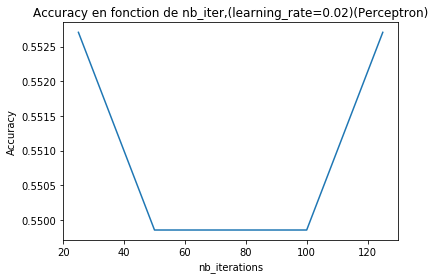

In [121]:
plt.title("Accuracy en fonction de nb_iter,(learning_rate=0.02)(Perceptron)")
plt.plot([25,50,75,100,125],listAccuracy_test_perce_nbit)
plt.xlabel('nb_iterations')
plt.ylabel('Accuracy')
plt.show()

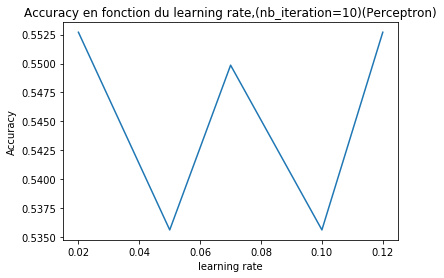

In [122]:
plt.title("Accuracy en fonction du learning rate,(nb_iteration=10)(Perceptron)")
plt.plot([0.02,0.05,0.07,0.10,0.12],listAccuracy_test_perce_learate)
plt.xlabel('learning rate')
plt.ylabel('Accuracy')
plt.show()

D'après nos resultat on a entre 53 et 55% de chance de prédire le l'équipe victorieuse d'un matche selon notre modèle.

Utilisons la méthode des out of bags  pour essayer d'obtenir une meilleure accuracy

In [44]:
nb_tree = [1,20,40,60,80,100]
E = coller_data(datasets)
accuracys_F_OOB = list()
accuracys_E_OOB = list()
for i in nb_tree:
    foret = ClassifierBaggingTree(i,0.3,0.0,True) 
    foret.train(E)
    accuracys_E_OOB.append(foret.accuracy(E))
    accuracys_F_OOB.append(foret.accuracy(datasets[9]))
plt.plot(nb_tree,accuracys_F_OOB)
plt.plot(nb_tree,accuracys_E_OOB)
plt.show()

RecursionError: maximum recursion depth exceeded